# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

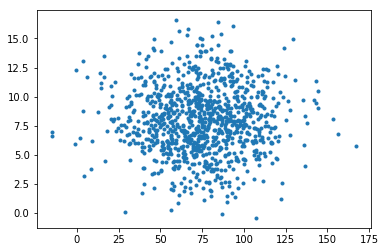

In [2]:
mu1 = 75
sigma1 = 25

mu2 = 8 
sigma2 = 3

amount = 1000

# зададим нормально распределенную случайную величину
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')
#print(y)

Нарисовать плотность распределения полученной выборки x.

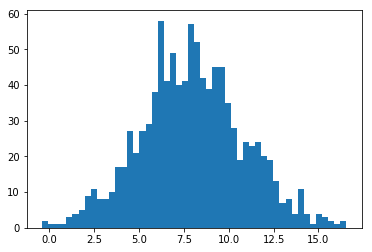

In [3]:
plt.hist(y,50)
plt.show()

Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки. Построить график зависимости (корелляции) x от y.

X
[[ 50.8198156    4.38290919]
 [ 77.50008931   6.67194019]
 [ 57.81895237  10.42022533]
 ...
 [130.77655043  11.39997882]
 [100.24708951   4.63244133]
 [ 91.1173074    4.01926106]]
Результат
[[ 42.18044695   3.63781463]
 [ 64.32507412   5.53771035]
 [ 47.98973047   8.64878702]
 ...
 [108.54453686   9.46198242]
 [ 83.20508429   3.8449263 ]
 [ 75.62736515   3.33598668]]


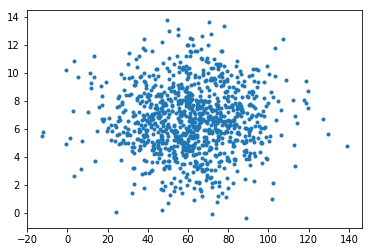

In [10]:
X = np.vstack((x, y)).T
n = 0.83
Scale = np.array([[n, 0], [0, n]])
Y = X.dot(Scale)
print('X')
print(X)
print('Результат')
print(Y)
plt.scatter(Y[:,0], Y[:,1], marker = '.')

Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x. 

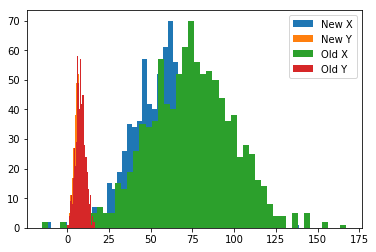

In [11]:
plt.hist(Y[:,0],50)
plt.hist(Y[:,1],50)
plt.hist(X[:,0],50)
plt.hist(X[:,1],50)
plt.legend(['New X', 'New Y', 'Old X', 'Old Y'])
plt.show()

Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0? 

0.00493439282694059


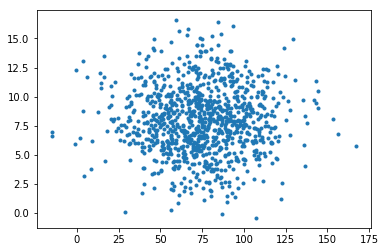

In [13]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print(corr)

#Корреляция Пирсона почти равна нулю. Это ознчает, что данные не взаимосвязаны между собой
#Положительное значение обозначает прямо пропорциональную зависимость, отрицательное - обратно пропорциоальную.

Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

Text(0.5, 1.0, 'Равномерное распределение')

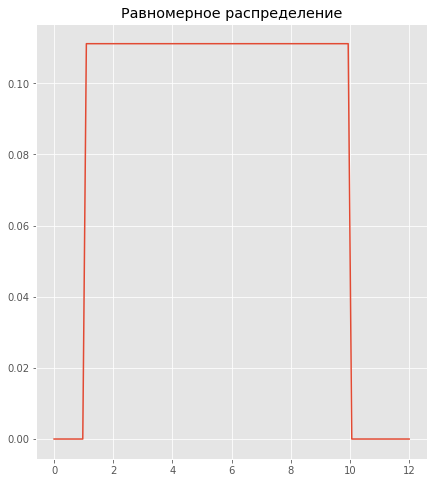

In [44]:
a = 1
b = 10

uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

x = np.linspace(0, 12, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)
plt.title('Равномерное распределение')
#В равномерном распределении данные сгенерированы искусственно, 
#а в нормальном - данные, сгенерированные природой (реальные данные)

Найти на графике примеры выброса. Что они означают?  

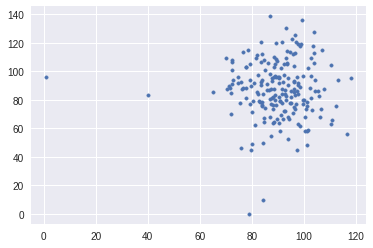

In [8]:
'''''
Выбросы находятся в точках: (0,100), (40,80), (80,0), (85,0). Выбросы - 
это отклонения данных, к которым сложно применить законы статистики. 
'''

Найти корелляцию в следующих данных: 

In [9]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [10]:
from sklearn import preprocessing #нормализация
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


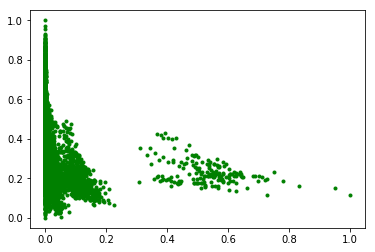

In [11]:
number = df_norm[0]
price = df_norm[1]
plt.plot(number, price, 'g.')

In [ ]:
#Обнаружена небольшая обратно пропорциональная зависимость (т.к.коэффициент = -0.2083170484878848)

-0.2083170484878848


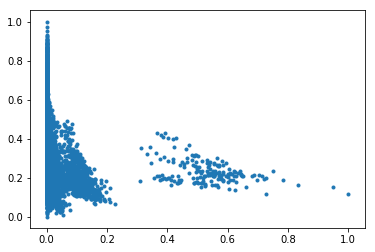

In [13]:
from scipy.stats import pearsonr #Расчет корреляции Пирсона
corr, p_value = pearsonr(number, price)
plt.scatter(number, price, marker='.')
print(corr)